In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


In [29]:
data = pd.read_csv("C:/Users/abdel/OneDrive/Bureau/Mémoire/credit_risk_dataset.csv", delimiter=';')
df = pd.DataFrame(data)
display(df)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [31]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [32]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28638 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  28638 non-null  int64  
 1   person_income               28638 non-null  int64  
 2   person_home_ownership       28638 non-null  object 
 3   person_emp_length           28638 non-null  float64
 4   loan_intent                 28638 non-null  object 
 5   loan_grade                  28638 non-null  object 
 6   loan_amnt                   28638 non-null  int64  
 7   loan_int_rate               28638 non-null  float64
 8   loan_status                 28638 non-null  int64  
 9   loan_percent_income         28638 non-null  float64
 10  cb_person_default_on_file   28638 non-null  object 
 11  cb_person_cred_hist_length  28638 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 2.8+ MB


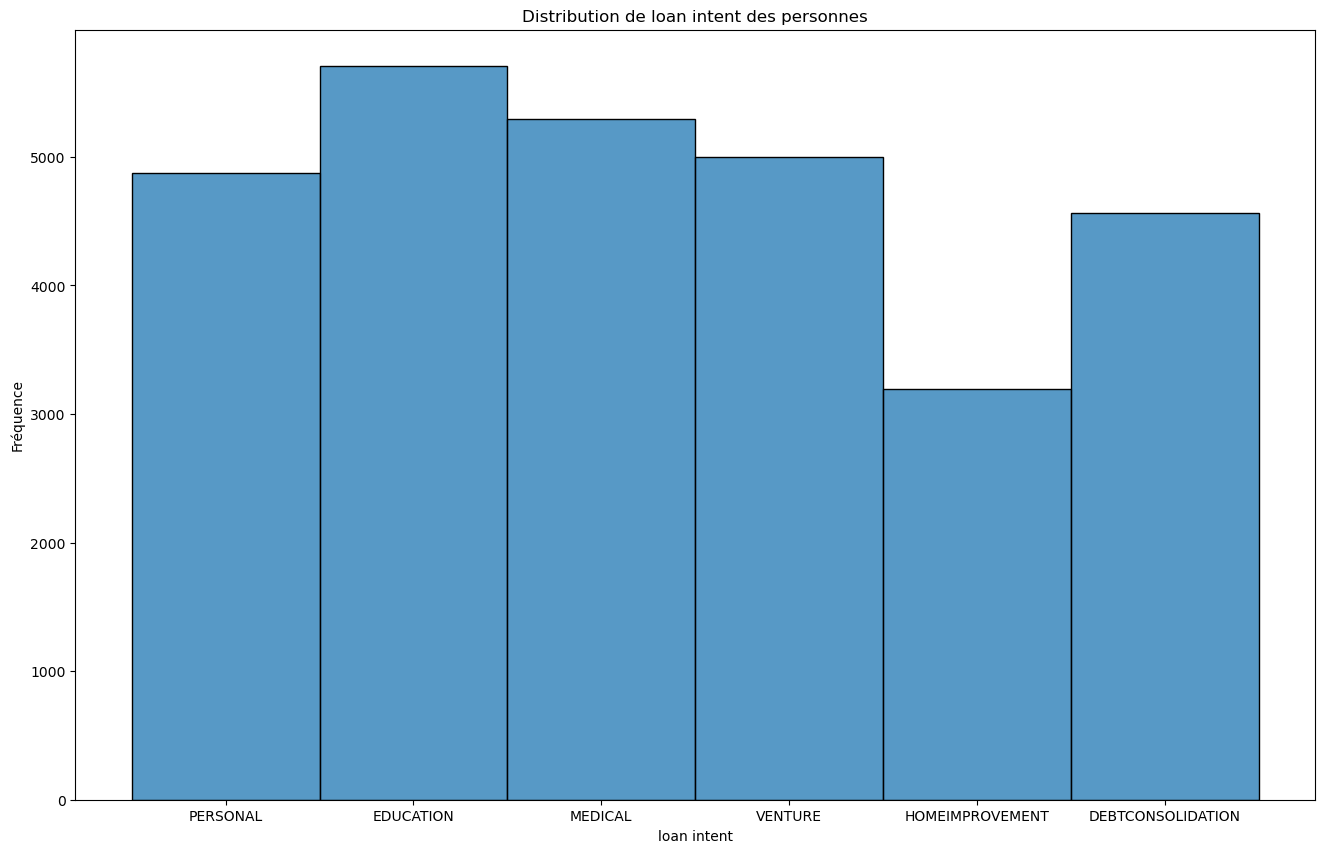

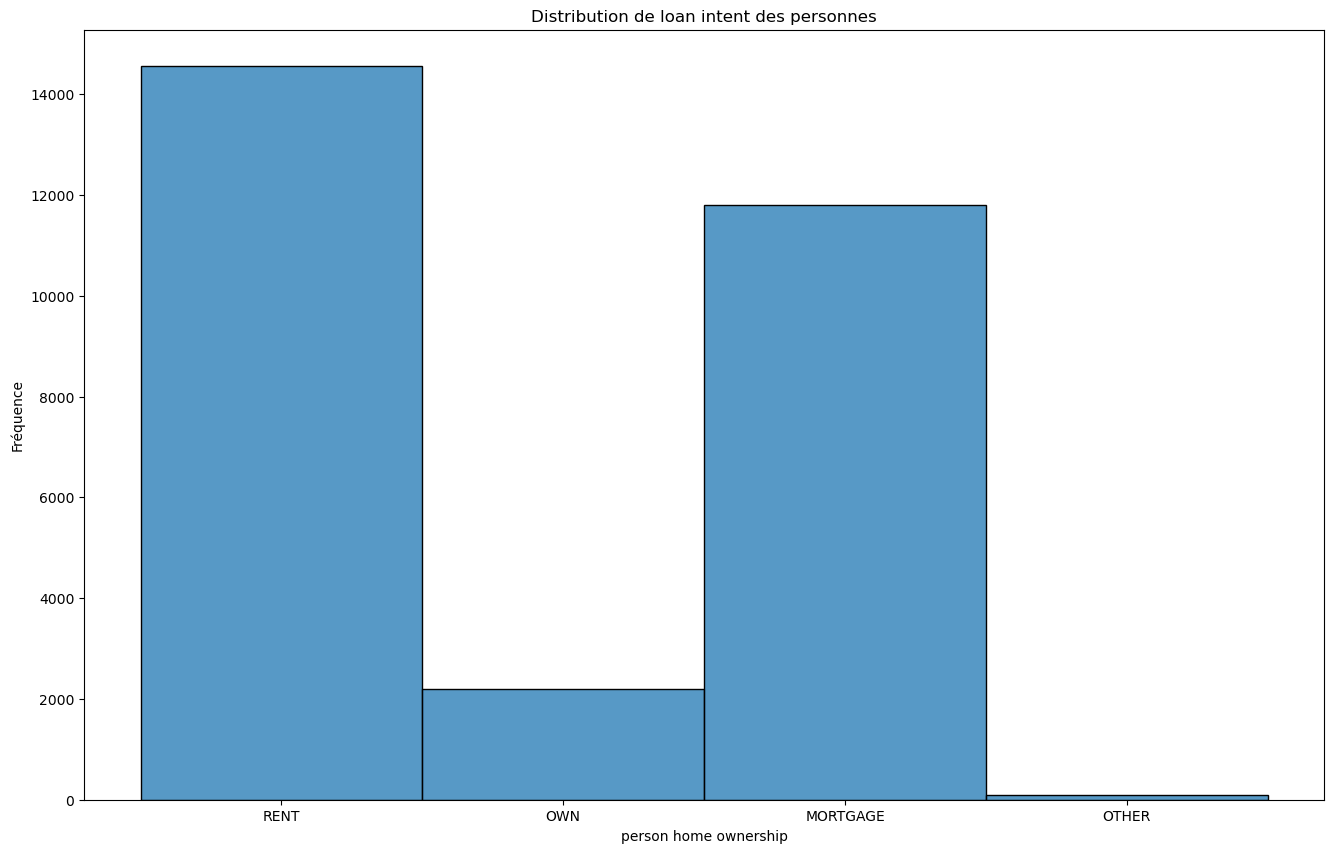

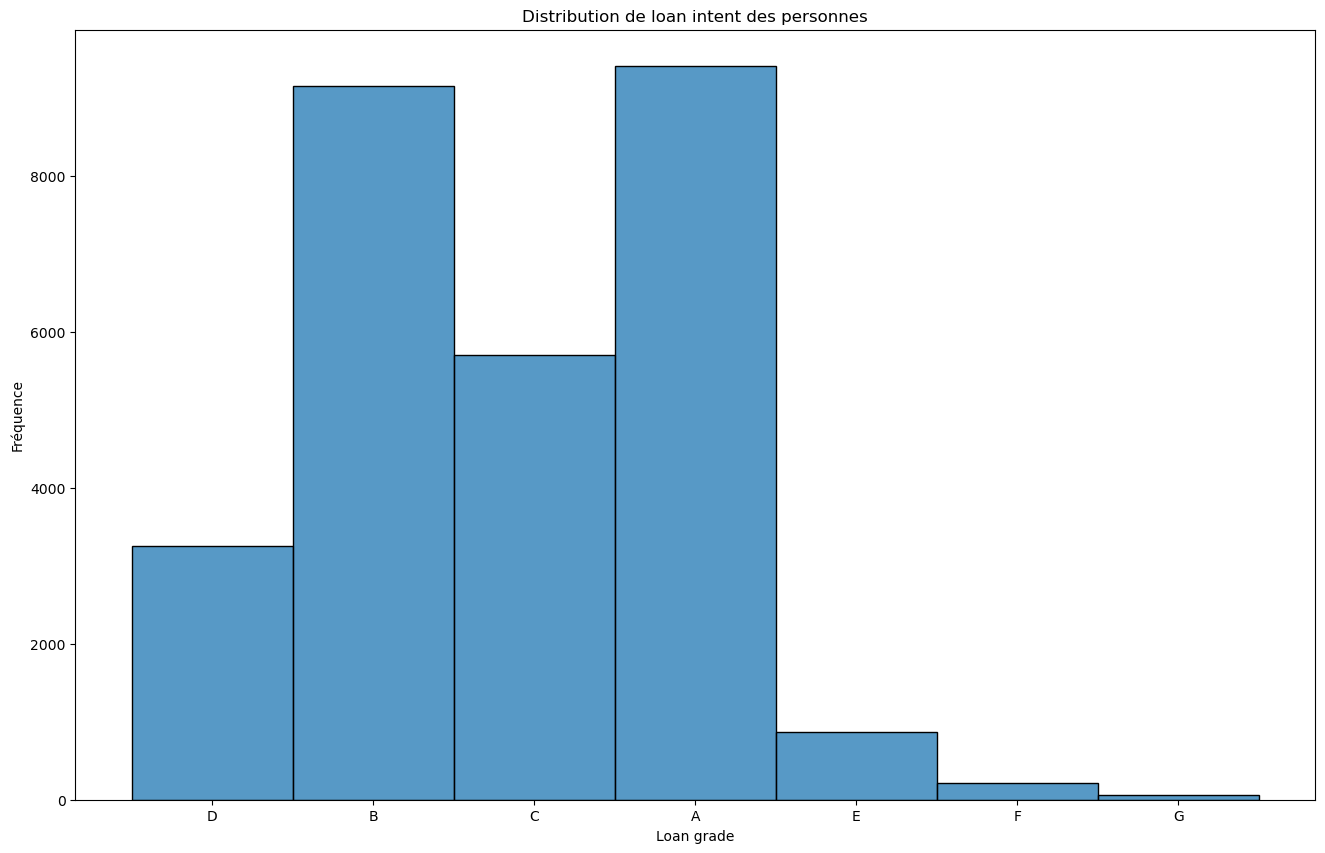

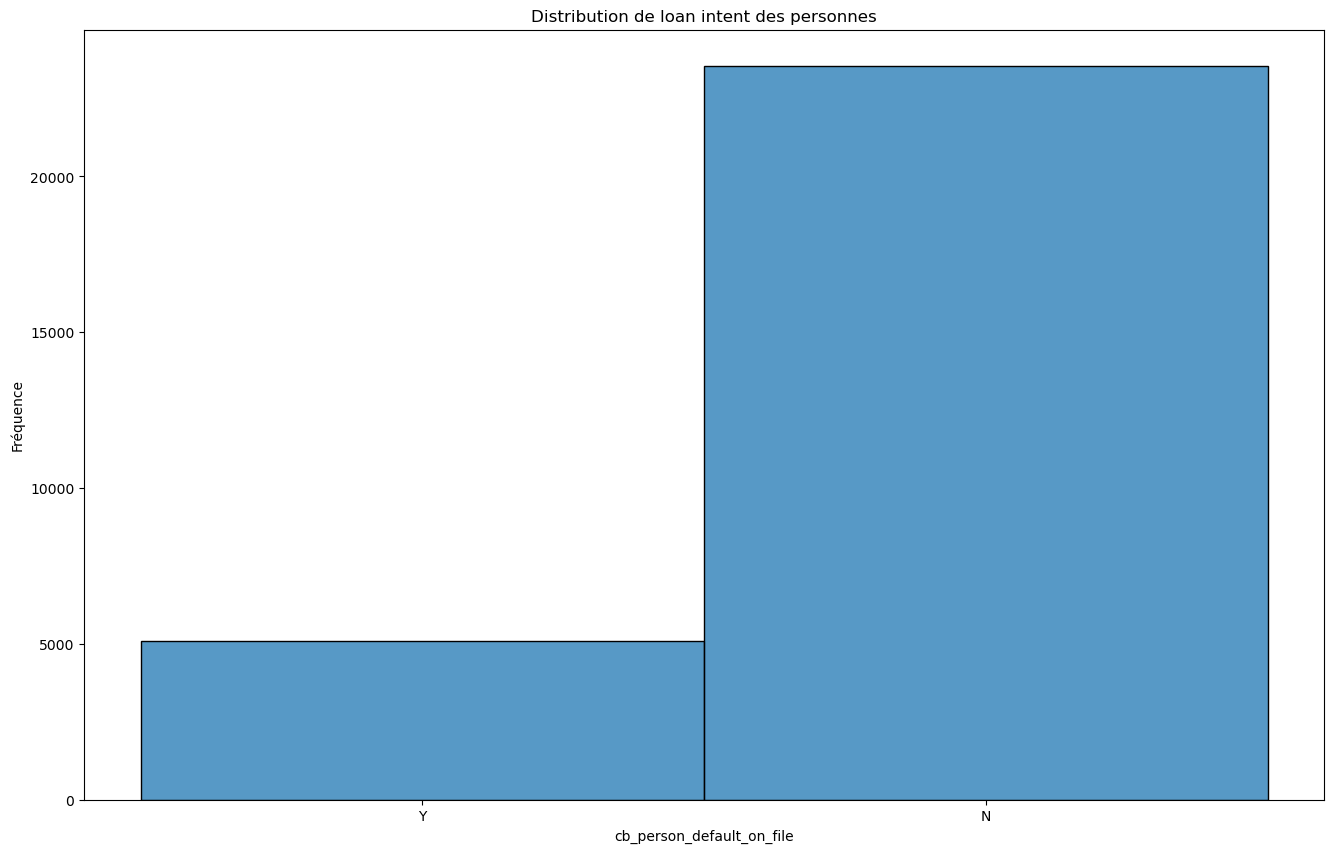

In [33]:
data=df
import matplotlib.pyplot as plt
import seaborn as sns

def plot_histogram(data, column, bins=30, title='Distribution', xlabel='Valeur', ylabel='Fréquence', figsize=(16, 10)):
    plt.figure(figsize=figsize)
    sns.histplot(data[column], bins=bins)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

plot_histogram(data, 'loan_intent', bins=30, title='Distribution de loan intent des personnes', xlabel='loan intent', ylabel='Fréquence')
plot_histogram(data, 'person_home_ownership', bins=30, title='Distribution de loan intent des personnes', xlabel='person home ownership', ylabel='Fréquence')
plot_histogram(data, 'loan_grade', bins=30, title='Distribution de loan intent des personnes', xlabel='Loan grade', ylabel='Fréquence')
plot_histogram(data, 'cb_person_default_on_file', bins=30, title='Distribution de loan intent des personnes', xlabel='cb_person_default_on_file', ylabel='Fréquence')

In [34]:
data['loan_grade'] = data['loan_grade'].replace({'A': 0,
                                                   'B': 1,
                                                   'C':2,
                                                   'D':3,
                                                   'E':4,
                                                   'F': 5,
                                                   'G':6})
data['cb_person_default_on_file'] = data['cb_person_default_on_file'].replace({'N': 0, 'Y' : 1} )


In [35]:
display(data)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,3,35000,16.02,1,0.59,1,3
1,21,9600,OWN,5.0,EDUCATION,1,1000,11.14,0,0.10,0,2
2,25,9600,MORTGAGE,1.0,MEDICAL,2,5500,12.87,1,0.57,0,3
3,23,65500,RENT,4.0,MEDICAL,2,35000,15.23,1,0.53,0,2
4,24,54400,RENT,8.0,MEDICAL,2,35000,14.27,1,0.55,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,2,5800,13.16,0,0.11,0,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,0,17625,7.49,0,0.15,0,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,1,35000,10.99,1,0.46,0,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,1,15000,11.48,0,0.10,0,26


In [36]:
data = pd.get_dummies(data, columns=['person_home_ownership', 'loan_intent'])

In [37]:
display(data)

,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,22,59000,123.0,3,35000,16.02,1,0.59,1,3,False,False,False,True,False,False,False,False,True,False
1,21,9600,5.0,1,1000,11.14,0,0.10,0,2,False,False,True,False,False,True,False,False,False,False
2,25,9600,1.0,2,5500,12.87,1,0.57,0,3,True,False,False,False,False,False,False,True,False,False
3,23,65500,4.0,2,35000,15.23,1,0.53,0,2,False,False,False,True,False,False,False,True,False,False
4,24,54400,8.0,2,35000,14.27,1,0.55,1,4,False,False,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,1.0,2,5800,13.16,0,0.11,0,30,True,False,False,False,False,False,False,False,True,False
32577,54,120000,4.0,0,17625,7.49,0,0.15,0,19,True,False,False,False,False,False,False,False,True,False
32578,65,76000,3.0,1,35000,10.99,1,0.46,0,28,False,False,False,True,False,False,True,False,False,False
32579,56,150000,5.0,1,15000,11.48,0,0.10,0,26,True,False,False,False,False,False,False,False,True,False


In [38]:
for colonne in data.select_dtypes(include=['bool']).columns:
    data[colonne] = data[colonne].astype(int)

In [39]:
display(data)

,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,22,59000,123.0,3,35000,16.02,1,0.59,1,3,0,0,0,1,0,0,0,0,1,0
1,21,9600,5.0,1,1000,11.14,0,0.10,0,2,0,0,1,0,0,1,0,0,0,0
2,25,9600,1.0,2,5500,12.87,1,0.57,0,3,1,0,0,0,0,0,0,1,0,0
3,23,65500,4.0,2,35000,15.23,1,0.53,0,2,0,0,0,1,0,0,0,1,0,0
4,24,54400,8.0,2,35000,14.27,1,0.55,1,4,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,1.0,2,5800,13.16,0,0.11,0,30,1,0,0,0,0,0,0,0,1,0
32577,54,120000,4.0,0,17625,7.49,0,0.15,0,19,1,0,0,0,0,0,0,0,1,0
32578,65,76000,3.0,1,35000,10.99,1,0.46,0,28,0,0,0,1,0,0,1,0,0,0
32579,56,150000,5.0,1,15000,11.48,0,0.10,0,26,1,0,0,0,0,0,0,0,1,0


In [40]:
colonnes_a_normaliser = ['person_age', 'person_income', 'person_emp_length',
                     'loan_grade', 'loan_amnt', 'loan_int_rate', 'cb_person_cred_hist_length']
scaler = StandardScaler()


data[colonnes_a_normaliser] = scaler.fit_transform(data[colonnes_a_normaliser])

In [41]:
X = data.drop('loan_status', axis=1)
y = data['loan_status']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
model_log = LogisticRegression()
model_log.fit(X_train, y_train)

LogisticRegression()

In [43]:
y_pred_log = model_log.predict(X_test)

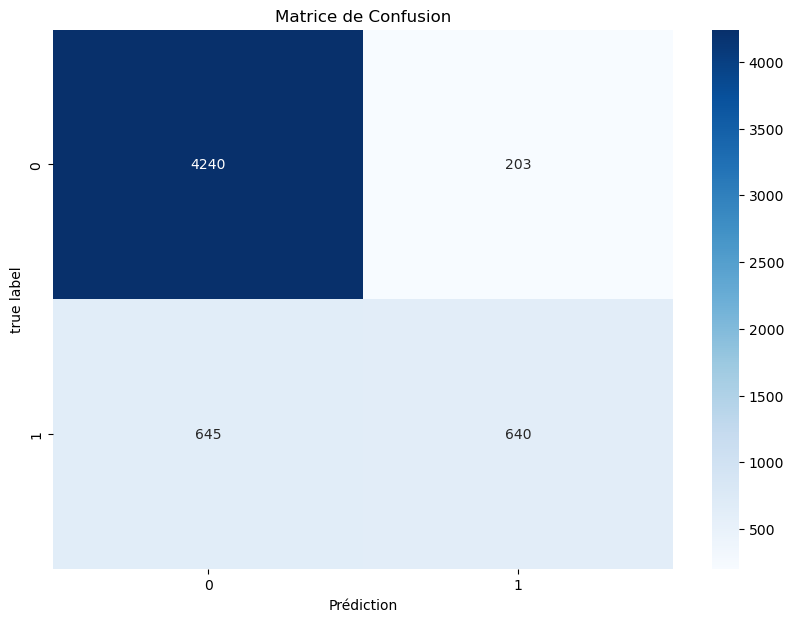

Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.95      0.91      4443
           1       0.76      0.50      0.60      1285

    accuracy                           0.85      5728
   macro avg       0.81      0.73      0.76      5728
weighted avg       0.84      0.85      0.84      5728

Accuracy Score: 0.8519553072625698


In [44]:
def plot_confusion_matrix(y_test, y_pred):
  cm = confusion_matrix(y_test, y_pred)

      # Afficher la matrice de confusion avec Seaborn
  plt.figure(figsize=(10,7))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
  plt.title('Matrice de Confusion')
  plt.xlabel('Prédiction')
  plt.ylabel('true label')
  plt.show()


  print("Classification Report: \n", classification_report(y_test, y_pred))
  print('Accuracy Score:', accuracy_score(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred_log)

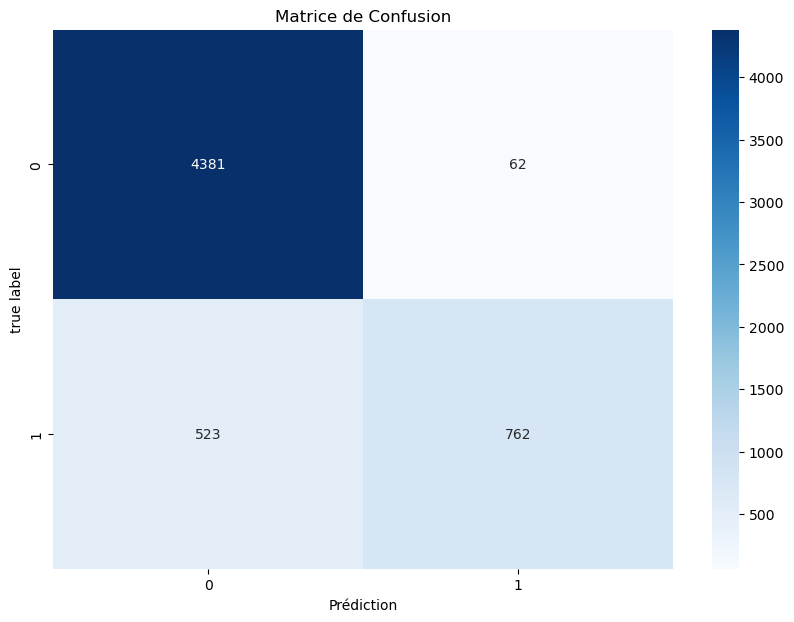

Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.99      0.94      4443
           1       0.92      0.59      0.72      1285

    accuracy                           0.90      5728
   macro avg       0.91      0.79      0.83      5728
weighted avg       0.90      0.90      0.89      5728

Accuracy Score: 0.8978701117318436


In [45]:
model_svm = SVC()
model_svm.fit(X_train, y_train)
y_pred_svm = model_svm.predict(X_test)
plot_confusion_matrix(y_test, y_pred_svm)

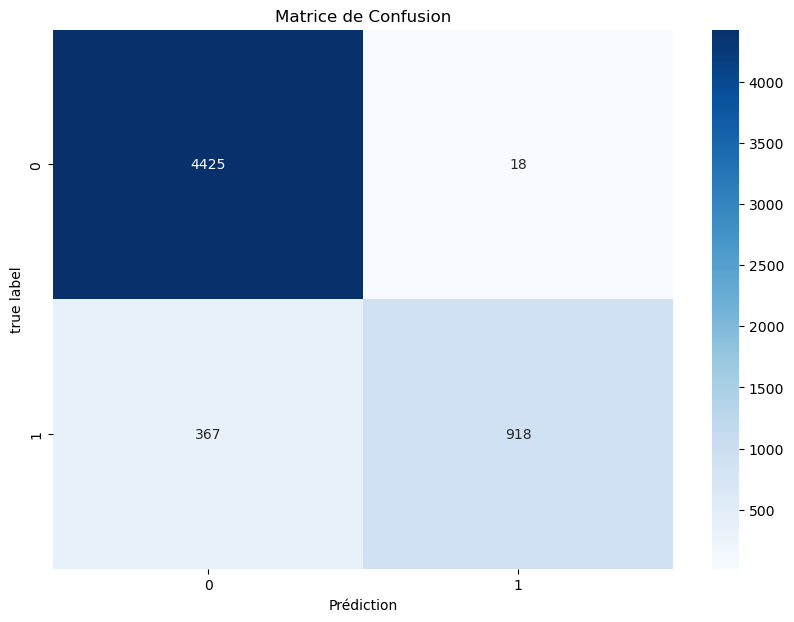

Classification Report: 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96      4443
           1       0.98      0.71      0.83      1285

    accuracy                           0.93      5728
   macro avg       0.95      0.86      0.89      5728
weighted avg       0.94      0.93      0.93      5728

Accuracy Score: 0.932786312849162


In [46]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
plot_confusion_matrix(y_test, y_pred_rf)

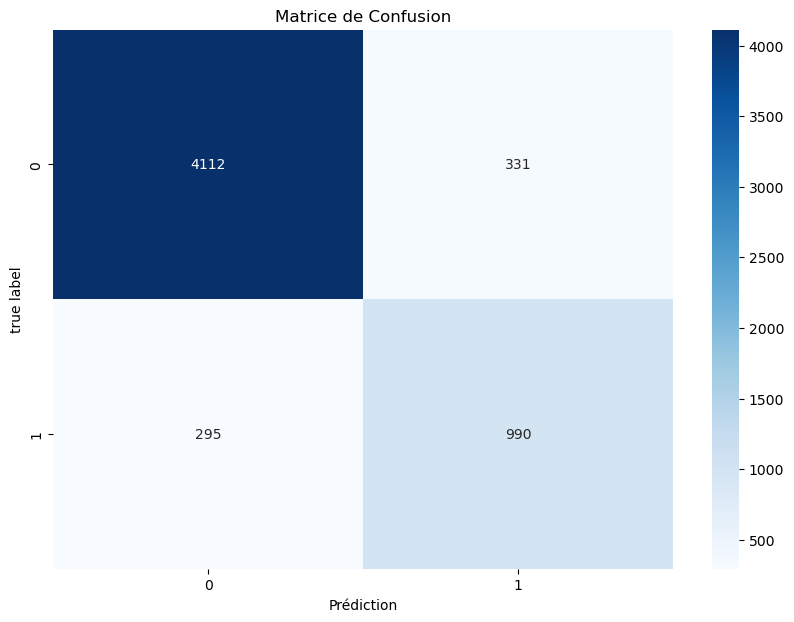

Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      4443
           1       0.75      0.77      0.76      1285

    accuracy                           0.89      5728
   macro avg       0.84      0.85      0.84      5728
weighted avg       0.89      0.89      0.89      5728

Accuracy Score: 0.8907122905027933


In [47]:
model_tree = DecisionTreeClassifier()
model_tree.fit(X_train, y_train)
y_pred_tree = model_tree.predict(X_test)
plot_confusion_matrix(y_test, y_pred_tree)

C:\Users\abdel\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


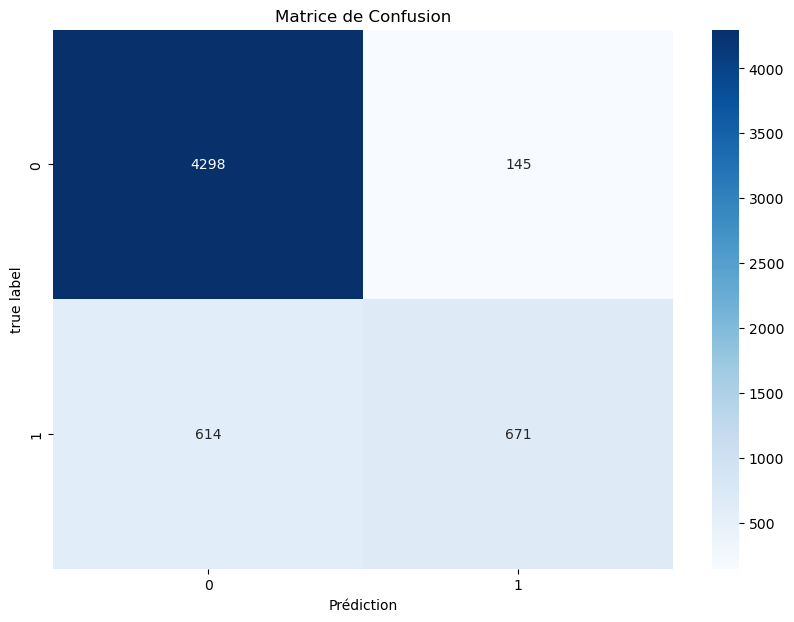

Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      4443
           1       0.82      0.52      0.64      1285

    accuracy                           0.87      5728
   macro avg       0.85      0.74      0.78      5728
weighted avg       0.86      0.87      0.86      5728

Accuracy Score: 0.8674930167597765


In [48]:
if not isinstance(X_test, np.ndarray):
    X_test = np.array(X_test)

model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)
plot_confusion_matrix(y_test, y_pred_knn)
